## The problem will be solved following principles of CRISP- DM Framework
    * CRISP DM: Cross Industry Standard Process for Data Mining

## 1- Business Understanding

### Business Goal
#### You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Data Preparation

    There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [35]:
### Importing all necessary packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.feature_selection import RFE

## 2- Data understanding

In [36]:
car_price=pd.read_csv('CarPrice_Assignment.csv', encoding='palmos')
car_price.shape

(205, 26)

In [37]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [38]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
## checking for null
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [40]:
def reg_ex_splitter(series,regex, split_index=0):
    """takes a series and apply the split.
    series:series object.\n regex:regular expr to use for split.\n split_index:index to retain post split"""
    import re
    ser=pd.Series(series)
    ser=ser.apply(lambda x: re.split(regex,str(x))[split_index])
    return ser

def get_colsby_dtype(data_frame, dtype='object',negate=False):
    """takes a panda dataframe and returns column name of specific type.
     \n data_frame:panda data frame.\n dtype:data type to search for defaults object.\n negate:boolean to toggle ==|!="""
    g = data_frame.columns.to_series().groupby(data_frame.dtypes).groups
    object_type=[]
    for k, v in g.items():
        if negate==False:
            if k==dtype:
                object_type.append(v.get_values().tolist())
        elif negate==True:
            if k!=dtype:
                object_type.append(v.get_values().tolist())
    flat_list=[i for x in object_type for i in x]
    return flat_list

#defining a scaling function
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))

In [41]:
## Applying business rule splitting car company name from model
car_price['CarName']=reg_ex_splitter(car_price['CarName'],regex='-|\s')

### spliting dataset by column types as categorical & numeric

In [42]:
## Visualizing object dtype coloumns
object_dtype_col=get_colsby_dtype(car_price)
nonobject_dtype_col=get_colsby_dtype(car_price,negate=True)

### Visualizing categorical data

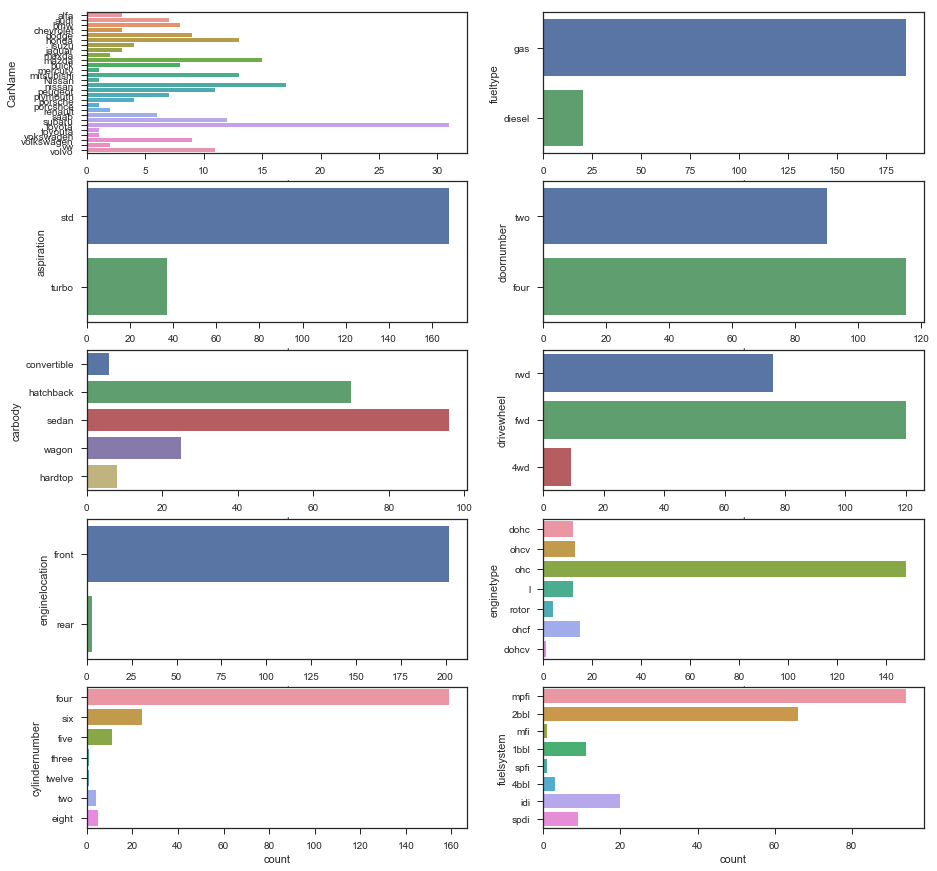

In [43]:
## Visualizing values in above columns plt.subplot(2,2,1)
def hist_countPlot(dataf,column,row_index=2,fig_index=1):
    plt.subplot(row_index,2,fig_index)
    sns.countplot(y=column, data=dataf)
    
#sns.pairplot(car_price[object_dtype_index])
plt.figure(figsize=(15,15))
for k in object_dtype_col:
    hist_countPlot(column=k,dataf=car_price,row_index=int(len(object_dtype_col)/2),fig_index=object_dtype_col.index(k)+1)
plt.show()

## 3- Data preparation

#### replacing numeric equivalent for numbers described in words in data

In [44]:
# As we can see above that cylindernumber and doornumber are numeric data expressed in words 
# we will convert them to equivalent numbers.

replacement = {"doornumber":     {"four": 4, "two": 2},"cylindernumber": {"two": 2,"three":3 ,"four": 4,"five": 5, "six": 6, "eight": 8,"twelve": 12, }}
car_price.replace(replacement,inplace=True)

#### Normalizing columns with two variables expressing other by other

In [45]:
# We have only two variants of each data in columns 
# enginelocation -> Front|Rear
# aspiration -> std/turbo
# fueltype ->gas/diesel

# We will apply dummies to this droping one of the column making other intrinsic i.e. gas_fueltype (1-> gas, 0 for diesel)
dummy=pd.get_dummies(car_price['enginelocation'],prefix='enginelocation',drop_first=True)
car_price=pd.concat([car_price,dummy],axis=1)
dummy=pd.get_dummies(car_price['aspiration'],prefix='aspiration',drop_first=True)
car_price=pd.concat([car_price,dummy],axis=1)
dummy=pd.get_dummies(car_price['fueltype'],prefix='fueltype',drop_first=True)
car_price=pd.concat([car_price,dummy],axis=1)
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginelocation_rear,aspiration_turbo,fueltype_gas
0,1,3,alfa,gas,std,2,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,0,0,1
1,2,3,alfa,gas,std,2,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,0,0,1
2,3,1,alfa,gas,std,2,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,0,0,1
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,0,0,1
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,0,0,1


#### Encoding labels with equivalent numbers

In [46]:
# We will represent labels in column carbody to equivalent number buckets
# convertible, sedan,hardtop,hatchback,wagon in bucket(0,1,2,3,4)

car_price["carbody"] = car_price["carbody"].astype('category')
car_price["carbody"] = car_price["carbody"].cat.codes

# We have 3 engines types broadly where OHC/DOHC is type of Overhead camshaft single/double,  inline internal combustion, rotor
# We will create encoding for them
replacement = {"enginetype":     {"ohc": 1, "dohc": 1,"dohcv": 1,"ohcf": 1,"ohcv": 1,"l": 0,"rotor": 2}}
car_price.replace(replacement,inplace=True)
car_price.drop(['enginelocation','aspiration','fueltype'],inplace=True,axis=1)

In [47]:
car_price.head()

,car_ID,symboling,CarName,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,enginelocation_rear,aspiration_turbo,fueltype_gas
0,1,3,alfa,2,0,rwd,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,0,0,1
1,2,3,alfa,2,0,rwd,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,0,0,1
2,3,1,alfa,2,2,rwd,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,0,0,1
3,4,2,audi,4,3,fwd,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,0,0,1
4,5,2,audi,4,3,4wd,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,0,0,1


In [48]:
# We left with one column with categorical data which we will label it
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
car_price["CarName_code"] = lb_make.fit_transform(car_price["CarName"])
car_price['drivewheel_code']=lb_make.fit_transform(car_price["drivewheel"])
car_price["fuelsystem_code"] = lb_make.fit_transform(car_price["fuelsystem"])
car_price.drop(['CarName','drivewheel','fuelsystem'],axis=1,inplace=True)

In [49]:
car_price.to_csv('car_price_normalized_notscaled.csv')

In [50]:
## Getting numerical data columns for visualizing the distribution
nonobject_dtype_col=get_colsby_dtype(car_price,negate=True)

#### Exploring data distribution to understand range

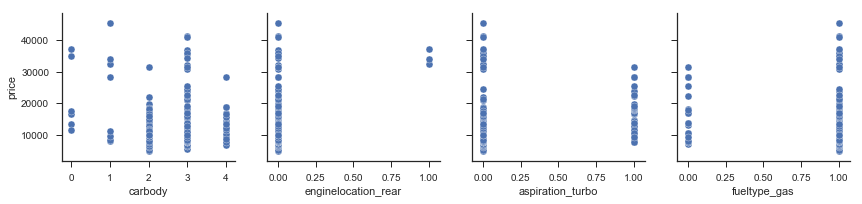

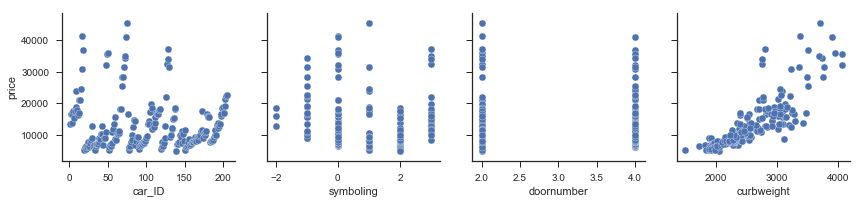

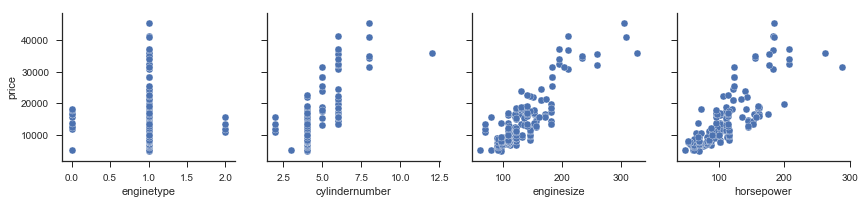

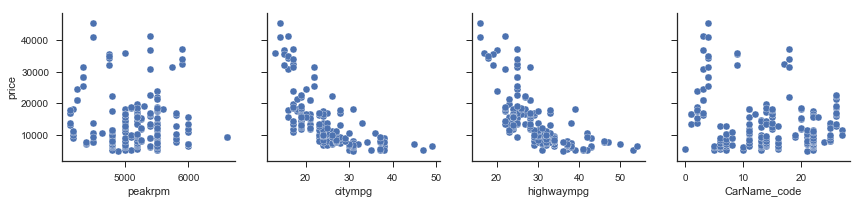

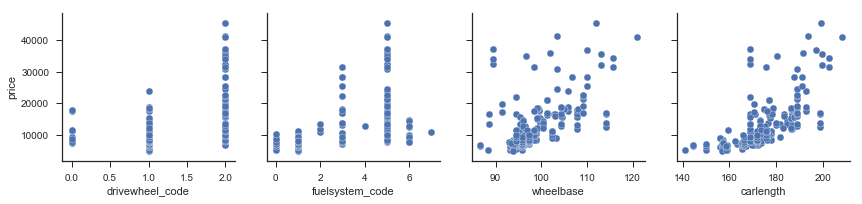

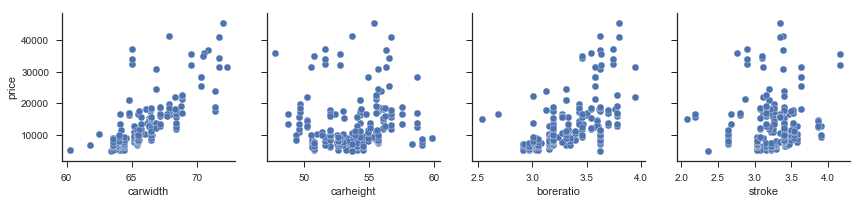

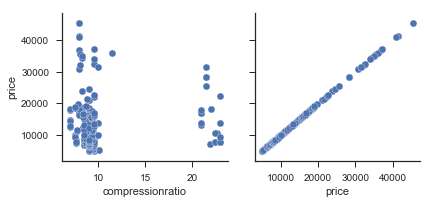

In [51]:
start_index=0
sns.set(style='ticks',color_codes=True)
for x in range(4,len(nonobject_dtype_col)+4,4):
    if start_index>len(nonobject_dtype_col):
        sns.pairplot(data=car_price,x_vars=nonobject_dtype_col[start_index:len(nonobject_dtype_col)], y_vars=['price'],size=3)
    else:
        sns.pairplot(data=car_price,x_vars=nonobject_dtype_col[start_index:x], y_vars=['price'],size=3)
    plt.show()
    start_index=x

#### Re-Scaling the data

In [52]:
# normalizing the data set by re-scaling
car_price[nonobject_dtype_col]=car_price[nonobject_dtype_col].apply(normalize)
car_price.to_csv('car_price_normalized_scaled.csv')
car_price.drop('car_ID',axis=1,inplace=True)
car_price.head()

,symboling,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,...,peakrpm,citympg,highwaympg,price,enginelocation_rear,aspiration_turbo,fueltype_gas,CarName_code,drivewheel_code,fuelsystem_code
0,0.433171,-0.560976,-0.653659,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.019512,-0.038049,...,-0.051070,-0.117209,-0.098716,0.005419,-0.014634,-0.180488,0.097561,-0.498826,0.336585,0.249477
1,0.433171,-0.560976,-0.653659,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,0.019512,-0.038049,...,-0.051070,-0.117209,-0.098716,0.080018,-0.014634,-0.180488,0.097561,-0.498826,0.336585,0.249477
2,0.033171,-0.560976,-0.153659,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,0.019512,0.161951,...,-0.051070,-0.172764,-0.125032,0.080018,-0.014634,-0.180488,0.097561,-0.498826,0.336585,0.249477
3,0.233171,0.439024,0.096341,0.030420,0.038071,0.024350,0.047927,-0.084781,0.019512,-0.038049,...,0.153011,-0.033875,-0.019769,0.016714,-0.014634,-0.180488,0.097561,-0.461789,-0.163415,0.249477
4,0.233171,0.439024,0.096341,0.018758,0.038071,0.041016,0.047927,0.104125,0.019512,0.061951,...,0.153011,-0.200542,-0.230295,0.103602,-0.014634,-0.180488,0.097561,-0.461789,-0.663415,0.249477


## 4- Modeling

### Splitting data into training and test dataset

####  Method: VIF Evaluation

In [53]:
## Function to calculate Variance Inflation Factor
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        #rsq=sm.OLS(formula="y~x", data=x_vars).fit().rsquared  
        #print(x)
        #print(rsq)
        vif=round(1/(1-rsq),2)
        #print(vif)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

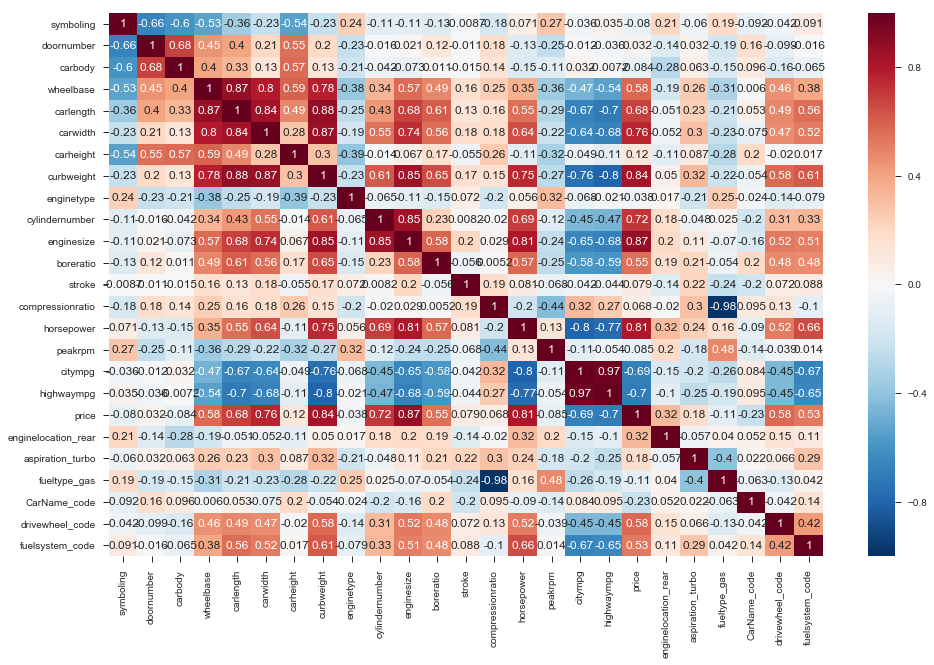

In [54]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(car_price.corr(),annot = True)
plt.show()

#### Method: OLS Summary

In [55]:
def get_OLS_summary(y,x):
    import statsmodels.api as sm  
    x = sm.add_constant(x)
    lm = sm.OLS(y,x).fit()
    return lm.summary()

In [56]:
# The below will give all the columns with datatype of not object
columns_X=get_colsby_dtype(car_price,negate=True)
filter_col_list_noprice=columns_X.copy()
filter_col_list_noprice.remove('price')

X=car_price[filter_col_list_noprice]
y=car_price['price']

# Spliting data
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=.7,test_size=.3, random_state=100)

In [57]:
print("Total number of columns in X_train & X_test: ",len(X_train.columns))

Total number of columns in X_train & X_test:  24


In [58]:
## REVIEWING VIF score
print(vif_cal(input_data=car_price[columns_X], dependent_col="price"))

                    Var     Vif
20         fueltype_gas  116.61
13     compressionratio  110.23
16              citympg   32.54
10           enginesize   31.97
17           highwaympg   28.64
7            curbweight   20.16
9        cylindernumber   15.22
14           horsepower   14.33
4             carlength   11.70
3             wheelbase   10.90
5              carwidth    7.08
11            boreratio    4.92
19     aspiration_turbo    3.26
0             symboling    3.03
6             carheight    2.87
1            doornumber    2.85
2               carbody    2.78
15              peakrpm    2.69
22      drivewheel_code    2.61
23      fuelsystem_code    2.60
12               stroke    2.08
8            enginetype    2.06
18  enginelocation_rear    1.82
21         CarName_code    1.60


In [59]:
summary=get_OLS_summary(y_train,X_train)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     48.69
Date:                Mon, 18 Jun 2018   Prob (F-statistic):           4.64e-50
Time:                        14:57:13   Log-Likelihood:                 203.06
No. Observations:                 143   AIC:                            -356.1
Df Residuals:                     118   BIC:                            -282.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0058    

In [60]:
# Removing high VIF
X_train.drop(['fueltype_gas','compressionratio','citympg','enginesize','highwaympg','curbweight','cylindernumber','horsepower','carlength','wheelbase',],axis=1,inplace=True)
col=car_price.describe().columns
col=col.delete(col.get_loc('fueltype_gas'))
col=col.delete(col.get_loc('compressionratio'))
col=col.delete(col.get_loc('citympg'))
col=col.delete(col.get_loc('enginesize'))
col=col.delete(col.get_loc('highwaympg'))
col=col.delete(col.get_loc('curbweight'))
col=col.delete(col.get_loc('cylindernumber'))
col=col.delete(col.get_loc('horsepower'))
col=col.delete(col.get_loc('carlength'))
col=col.delete(col.get_loc('wheelbase'))

#print(col)
print(vif_cal(input_data=car_price[col.append(pd.Index(['price']))], dependent_col="price"))
summary=get_OLS_summary(y_train,X_train)
print(summary)

                    Var   Vif
1            doornumber  2.54
2               carbody  2.46
3              carwidth  2.33
0             symboling  2.24
4             carheight  2.06
6             boreratio  2.04
13      fuelsystem_code  1.82
12      drivewheel_code  1.70
8               peakrpm  1.45
5            enginetype  1.35
9   enginelocation_rear  1.28
10     aspiration_turbo  1.28
11         CarName_code  1.28
7                stroke  1.20
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 18 Jun 2018   Prob (F-statistic):           2.55e-40
Time:                        14:57:13   Log-Likelihood:                 153.64
No. Observations:                 143   AIC:                            -277

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
# Creating X_test dataframe with RFE selected variables

# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
rfe = RFE(lm, 8)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False False False  True False  True False  True  True  True False  True
  True  True]
[4 5 7 1 2 1 3 1 1 1 6 1 1 1]


In [62]:
col=col = X_train.columns[rfe.support_]
#drop_col=X_train.columns[~(rfe.support_)]
X_train_rfe=X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
summary=get_OLS_summary(y_train,X_train_rfe)
print(summary)

print(vif_cal(input_data=car_price[col.append(pd.Index(['price']))], dependent_col="price"))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     72.39
Date:                Mon, 18 Jun 2018   Prob (F-statistic):           6.71e-45
Time:                        14:57:13   Log-Likelihood:                 151.77
No. Observations:                 143   AIC:                            -285.5
Df Residuals:                     134   BIC:                            -258.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0036    

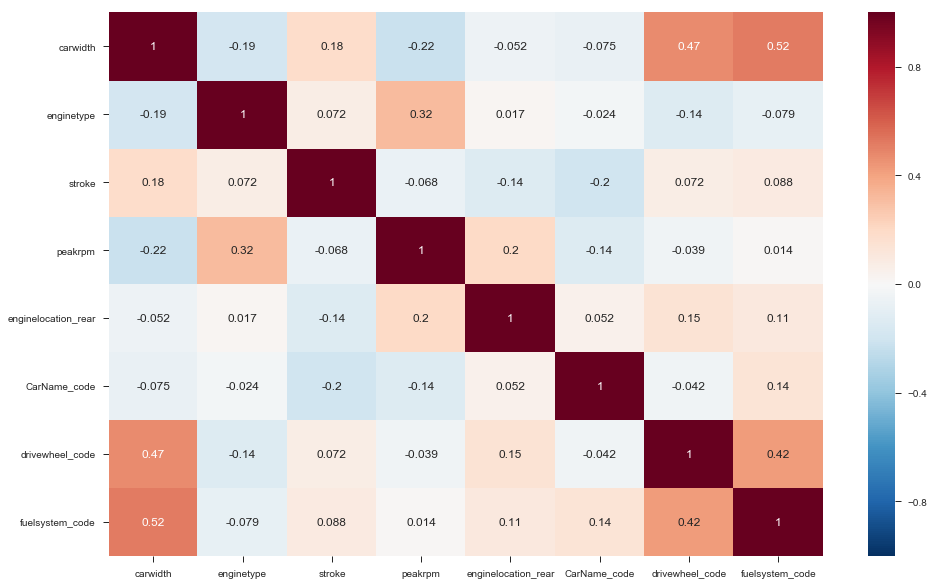

In [64]:
# Let's see the correlation matrix, and it looks like the variable are well disbursed with less VIF
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(car_price[col].corr(),annot = True)
plt.show()

## 5- Making Predictions

In [65]:
print(col)

Index(['carwidth', 'enginetype', 'stroke', 'peakrpm', 'enginelocation_rear',
       'CarName_code', 'drivewheel_code', 'fuelsystem_code'],
      dtype='object')


In [66]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col]
lm = sm.OLS(y_train,X_train_rfe).fit()

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

## 6- Model Evaluation

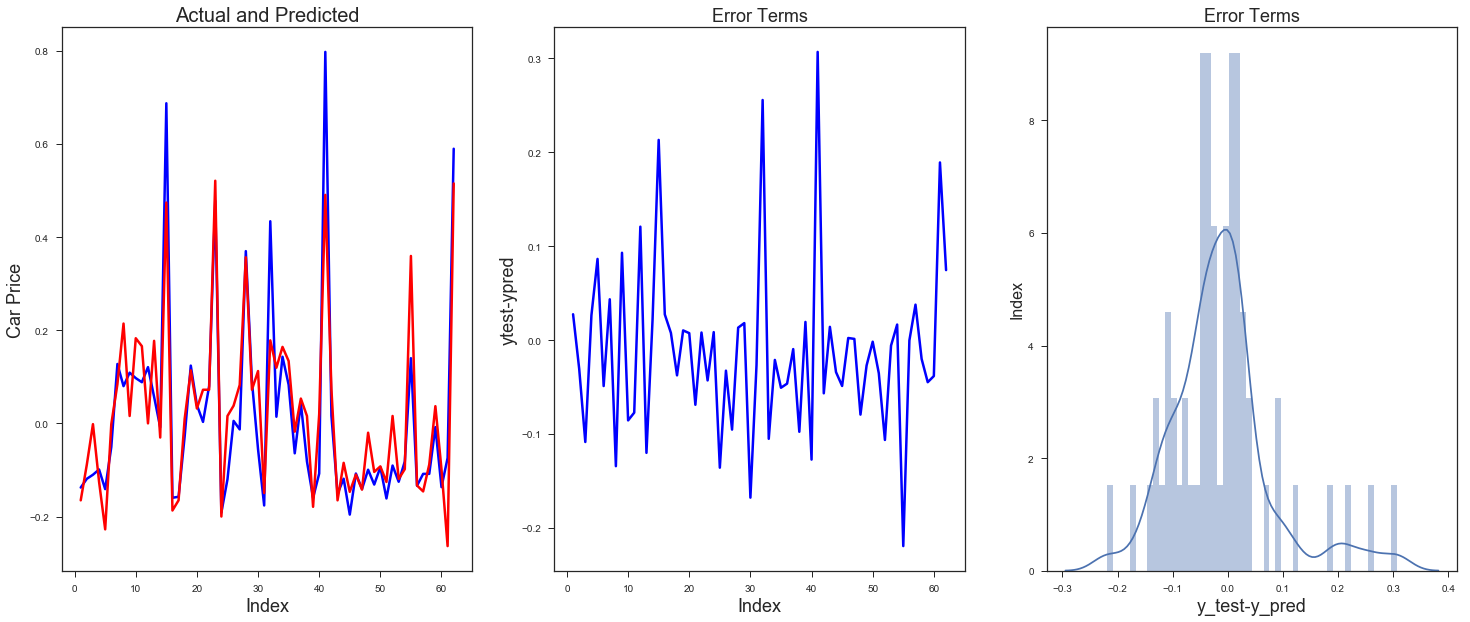

In [67]:
c = [i for i in range(1,63,1)] # generating index 
plt.figure(1,figsize=(25,10)) 
plt.subplot(131)
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=18)                       # Y-label
plt.subplot(132)
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Terms', fontsize=18)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=18)
plt.subplot(133)
sns.distplot((y_test-y_pred),bins=50)
plt.title('Error Terms', fontsize=18)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)    
plt.show()

In [68]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0926048141751


### Summary
#### The top 7 variable contributed to car price are 
    * carwidth
    * enginetype
    * peakrpm
    * enginelocation_rear
    * CarName_code 
    * drivewheel_code
    * fuelsystem_code'